<a href="https://colab.research.google.com/github/EzginazYalcin/Medikal-fiyat-analizi/blob/main/summercampproject1_ipynb_ikinci_grup_F%C4%B0NAL_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [ ]:
data = pd.read_csv("insurance.csv")


In [ ]:
type(data)    #veriler  DataFrame olduğu için herhangi bir dönüştürme yapmıyoruz.

pandas.core.frame.DataFrame

In [ ]:
data.head(10)  #ilk 10 satırı okuttuk.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.tail()  #son 5 satırı okuttuk.

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.info   #veri hakkındaki özet bilgileri inceledik. 

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
data.columns    #sütunlara ve data tipine baktık.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.axes  #satırlara ve data tipine baktık. 

[RangeIndex(start=0, stop=1338, step=1),
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')]

In [ ]:
#describe() metodu ile sayısal verilere sahip olan sütunların max, min , std…gibi istatiksel değerlerini gösterdik.
data.describe().T   

#vücut kitle indeksinin (bmi) en düşük 15.96 iken max değeri 53.13 imiş.

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
data.shape   #Verimizin kaç satır ve sütundan oluştuğuna baktık.

(1338, 7)

**KEŞİFSEL VERİ ANALİZİ YAPILMASI**

Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz.

In [ ]:
min_bmi = data["bmi"].min() #bmi minumum değeri
max_bmi = data["bmi"].max() #bmi maksimum değeri
print(min_bmi)
print(max_bmi)


15.96
53.13


Bmi=ağırlık/(boy*boy) şeklinde hesaplanır. Boy metre cinsinden verilir.

Bmi 18 ile < 25 aralığındaysa normal,

Bmi 25 ile <30 aralığındaysa kilolu,

Bmi 30 ve daha yüksekse obez,

Bmi 35 ve daha fazlaysa ciddi obez olarak kabul edilir.

In [ ]:
#value_counts() verinin keşfi sırasında kullanılan oldukça kullanışlı bir metottur. Sütundaki NaN olmayan her bir unique değerin kaç kez kullanıldığını gösteren bir seri döndürür. Bu seri default olarak azalan şekilde sıralanmıştır ve NaN değerleri içermez.
data["bmi"].value_counts()   

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [ ]:
#Bmi 18 ile < 25 aralığındaki normal bireyleri filtreledik.Burada 18 ve 25 dahil olmadığından (19,25) (19 dahil 25 dail değil demek) yaptık.
normal=data["bmi"].between(19,25)   
data[normal]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


In [ ]:
#Bmi 25 ile < 30 aralığındaki kilolu bireyleri filtreledik. Burada 25 ve 30 dahil olmadığından (26,30) (26 dahil 30 dahil değil demek) yaptık.

kilolu=data["bmi"].between(26,30)  
data[kilolu]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
...,...,...,...,...,...,...,...
1311,33,female,26.695,0,no,northwest,4571.41305
1315,18,male,28.310,1,no,northeast,11272.33139
1319,39,female,26.315,2,no,northwest,7201.70085
1321,62,male,26.695,0,yes,northeast,28101.33305


In [ ]:
#Bmi 30 dan büyük olan obez bireyleri filtreledik. Burada 30 dahil >=30 yaptık
obez=data["bmi"]>=30 
data[obez]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
6,46,female,33.44,1,no,southeast,8240.58960
12,23,male,34.40,0,no,southwest,1826.84300
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1333,50,male,30.97,3,no,northwest,10600.54830
1334,18,female,31.92,0,no,northeast,2205.98080


In [ ]:
ciddi_obez=data["bmi"]>=35 #Bmi 35 ve daha fazla olan bireyleri ciddi obez filtreledik.
data[ciddi_obez]

,age,sex,bmi,children,smoker,region,charges
13,56,female,39.820,0,no,southeast,11090.71780
14,27,male,42.130,0,yes,southeast,39611.75770
18,56,male,40.300,0,no,southwest,10602.38500
19,30,male,35.300,0,yes,southwest,36837.46700
20,60,female,36.005,0,no,northeast,13228.84695
...,...,...,...,...,...,...,...
1322,62,male,38.830,0,no,southeast,12981.34570
1323,42,female,40.370,2,yes,southeast,43896.37630
1329,52,male,38.600,2,no,southwest,10325.20600
1332,52,female,44.700,3,no,southwest,11411.68500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


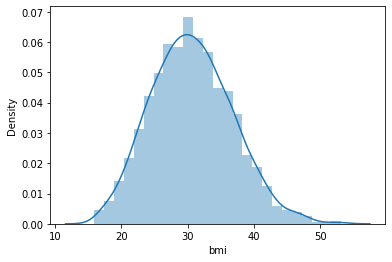

In [ ]:
#vucüt kitle endeksi dağılımlarını histogram sütun grafiği ile göster
bmi= data["bmi"]
sns.distplot(bmi)
plt.show()

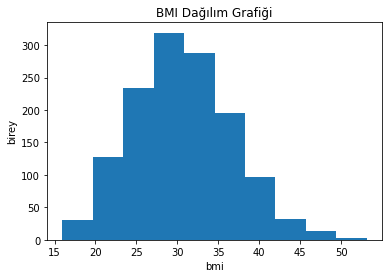

In [ ]:
bmi = data["bmi"]
plt.hist(bmi)
plt.xlabel("bmi")
plt.ylabel("birey")
plt.title("BMI Dağılım Grafiği")
plt.show()

#bütün datadaki bmi-birey grafiğini gösteren grafik

“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [ ]:
smoker= data["smoker"].value_counts()
smoker
#1064 birey sigara içmiyor, 274 birey sigara içiyor

no     1064
yes     274
Name: smoker, dtype: int64

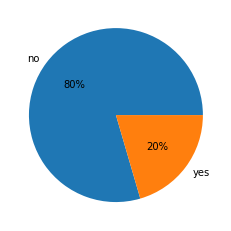

In [ ]:
smoker = data["smoker"].value_counts()
plt.pie(smoker, labels=smoker.index,  autopct='%1.0f%%')
#Display the chart
plt.show()
#sigara içenleri ve içmeyenleri pasta grafikte yüzdelikleri ile göster

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

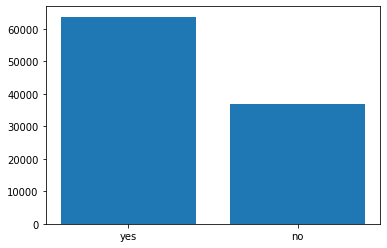

In [ ]:
#sigara içenlerinlerin sigortaya ödediği miktar daha fazla
plt.bar(data["smoker"], data["charges"])
plt.imshow

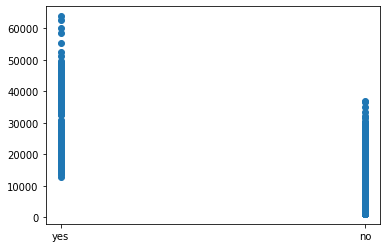

In [ ]:
#sigara içenler ve fiyatlandırma arasındaki ilişkiyi göster
#sns.scatterplot(y='charges',x='smoker',data=data)
plt.scatter(data["smoker"], data["charges"])
plt.show()

“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

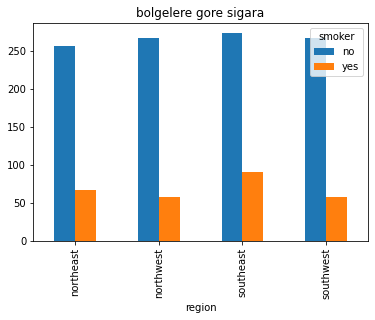

In [ ]:
bolgelere_gore_sigara = pd.crosstab(index=data["region"], columns=data["smoker"])
bolgelere_gore_sigara.plot(kind="bar")
plt.title("bolgelere gore sigara")
plt.show()

“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

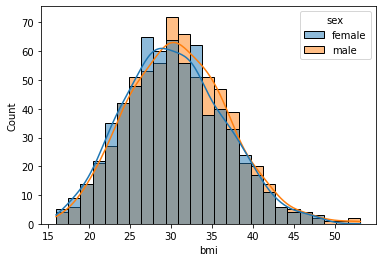

In [ ]:
#vucüt kitle endeksi ile cinsiyet arasındaki ilişki
sns.histplot(x='bmi', data=data, kde=True, hue='sex')

En çok “children”’a sahip “region”’ı bulunuz.

In [ ]:
#bölgelerdeki maks çocuklar
max_children_in_region = data.groupby(['region'])["children"].max()
print(max_children_in_region)

region
northeast    5
northwest    5
southeast    5
southwest    5
Name: children, dtype: int64


“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

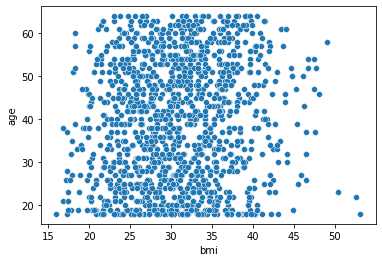

In [ ]:
#yaş ile vucüt kitle endeksi dağılımı
sns.scatterplot(x='bmi', y='age', data=data)

“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

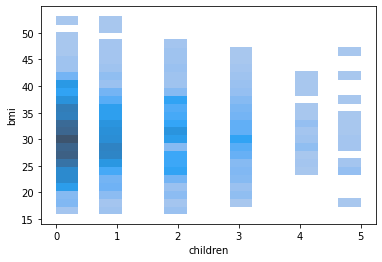

In [ ]:
#vucüt kitle endeksi ve çocuklar arasındaki ilişki
sns.histplot(x='children', y='bmi', data=data, kde=True)

“bmi” değişkeninde outlier var mıdır? İnceleyiniz.

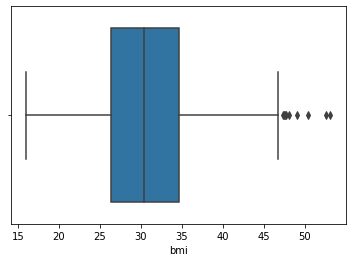

In [ ]:
#outlier nedir? Aykırı değer, bir veri setindeki gözlemlerin geri kalanından büyük ölçüde farklı olan herhangi bir veri noktasıdır. 
#Diğer bir tanımla genel eğilimin oldukça dışına çıkan gözlemdir.
#kutu grafiği yöntemi ile dışarıda kalan değerleri incele
#47den sonrası aykırı değerdir
sns.boxplot(x=data["bmi"])

“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

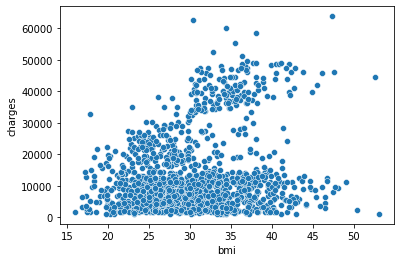

In [ ]:
#vucüt kitle endeksi ve fiyatlandırma arasındaki ilişki
#bmi ve chagers arasındaki ilişki
sns.scatterplot(x='bmi', y='charges', data=data)

“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

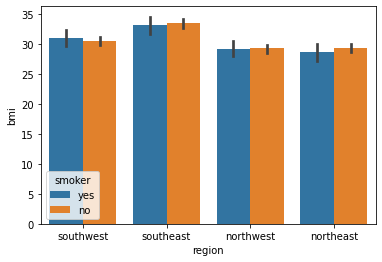

In [ ]:
#sigara içen ve içmeyenlerin bölgelerdeki dağılımına göre vucüt kitle endekslerini bulma
sns.barplot(x='region',y='bmi', data=data,
            hue='smoker')
 
plt.show()

VERİ ÖN İŞLEMESİ

Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini
kullanınız.

In [ ]:
#Label encoder kütüphanesi
from sklearn.preprocessing import LabelEncoder
#sözel verilerimizin sayısal verilere dönüştürülmesi, binary(1 yada 0).
le = LabelEncoder()
#cinsiyet 0 yada 1 şeklinde kodlandı
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
#sigara içenler 0 ya da 1 şeklinde kodlandı
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#bölgeler 0,1,2,3 olmak üzere kodlandı.
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)


In [ ]:
#encoder sonrası datamızın değişimi, 

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Veri setini normalize ederek ölçekleyiniz.

In [ ]:
#normalizasyon için ise verilerin dağılım şeklini değiştiriyoruz
from sklearn.preprocessing import Normalizer
norm_scaled_data = Normalizer().fit(data).transform(data)
print(norm_scaled_data)

[[1.12526190e-03 0.00000000e+00 1.65235827e-03 ... 5.92243106e-05
  1.77672932e-04 9.99997984e-01]
 [1.04288680e-02 5.79381554e-04 1.95657151e-02 ... 0.00000000e+00
  1.15876311e-03 9.99753173e-01]
 [6.29259576e-03 2.24735563e-04 7.41627357e-03 ... 0.00000000e+00
  4.49471125e-04 9.99952346e-01]
 ...
 [1.10405699e-02 0.00000000e+00 2.26025000e-02 ... 0.00000000e+00
  1.22672999e-03 9.99682814e-01]
 [1.04570071e-02 0.00000000e+00 1.28471802e-02 ... 0.00000000e+00
  1.49385816e-03 9.99861675e-01]
 [2.09323914e-03 0.00000000e+00 9.97548554e-04 ... 3.43153957e-05
  3.43153957e-05 9.99997310e-01]]


In [ ]:
# ölçekleme işleminde verilerinizin (range) sırasını değiştiriyoruz
#normalizasyon için ise verilerin dağılım şeklini değiştiriyoruz
from sklearn.preprocessing import StandardScaler
std_scaled_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

print(std_scaled_data)
print(std_scaled_data.mean(axis=0))
print(std_scaled_data.std(axis=0))

           age       sex       bmi  children    smoker    region   charges
0    -1.438764 -1.010519 -0.453320 -0.908614  1.970587  1.343905  0.298584
1    -1.509965  0.989591  0.509621 -0.078767 -0.507463  0.438495 -0.953689
2    -0.797954  0.989591  0.383307  1.580926 -0.507463  0.438495 -0.728675
3    -0.441948  0.989591 -1.305531 -0.908614 -0.507463 -0.466915  0.719843
4    -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.466915 -0.776802
...        ...       ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926 -0.507463 -0.466915 -0.220551
1334 -1.509965 -1.010519  0.206139 -0.908614 -0.507463 -1.372326 -0.914002
1335 -1.509965 -1.010519  1.014878 -0.908614 -0.507463  0.438495 -0.961596
1336 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463  1.343905 -0.930362
1337  1.551686 -1.010519 -0.261388 -0.908614  1.970587 -0.466915  1.311053

[1338 rows x 7 columns]
age        -1.805565e-16
sex        -1.234687e-16
bmi        -2.124194e-16


In [ ]:
x=std_scaled_data.drop(['charges'],axis=1)
y=std_scaled_data.charges

Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.

In [ ]:
from sklearn.model_selection import train_test_split
#test ve train olmak üzere 2ye ayrılıyor data, random state ile hep aynı yerden bölünüyor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

MODEL SEÇİMİ

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)
LinearRegression()
x_train_predict=model.predict(x_train)
x_test_predict=model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))


0.7368306228430945
0.7998747145449959


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score,median_absolute_error
print("R-Kare=%0.2f"%r2_score(y_test,x_test_predict))
print("MAE=%0.2f"%mean_absolute_error(y_test,x_test_predict))
print("MSE=%0.2f"%mean_squared_error(y_test,x_test_predict))
print("MedAE=%0.2f"%median_absolute_error(y_test,x_test_predict))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,x_test_predict)))

R-Kare=0.80
MAE=0.32
MSE=0.22
MedAE=0.19
RMSE=0.47


In [ ]:
from sklearn.linear_model import Ridge

##training the model
model_1 = Ridge(alpha=0.05)
model_1.fit(x_train,y_train)
Ridge()
x_train_predict=model_1.predict(x_train)
x_test_predict=model_1.predict(x_test)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

0.736830621165326
0.7998711703768575


In [ ]:

print("R-Kare=%0.2f"%r2_score(y_test,x_test_predict))
print("MAE=%0.2f"%mean_absolute_error(y_test,x_test_predict))
print("MSE=%0.2f"%mean_squared_error(y_test,x_test_predict))
print("MedAE=%0.2f"%median_absolute_error(y_test,x_test_predict))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,x_test_predict)))

R-Kare=0.80
MAE=0.32
MSE=0.22
MedAE=0.19
RMSE=0.47


In [ ]:
from sklearn.linear_model import Lasso

##training the model
model_2 = Lasso(alpha=0.005)
model_2.fit(x_train,y_train)
Ridge()
x_train_predict=model_2.predict(x_train)
x_test_predict=model_2.predict(x_test)
print(model_2.score(x_train,y_train))
print(model_2.score(x_test,y_test))

0.7367014833822774
0.7986673855201755


In [ ]:
print("R-Kare=%0.2f"%r2_score(y_test,x_test_predict))
print("MAE=%0.2f"%mean_absolute_error(y_test,x_test_predict))
print("MSE=%0.2f"%mean_squared_error(y_test,x_test_predict))
print("MedAE=%0.2f"%median_absolute_error(y_test,x_test_predict))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,x_test_predict)))

R-Kare=0.80
MAE=0.33
MSE=0.22
MedAE=0.19
RMSE=0.47


Çoklu Doğrusal Regresyon

In [ ]:
X=np.append(arr=np.ones((1338,1)).astype(int),values=x,axis=1)
import statsmodels.api as sm 
X_yeni=X[:,[0,1,2,3,4,5]]
model_regresyon_OLS=sm.OLS(endog=y,exog=X_yeni).fit()
print(model_regresyon_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:25:58   Log-Likelihood:                -971.85
No. Observations:                1338   AIC:                             1956.
Df Residuals:                    1332   BIC:                             1987.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.052e-17      0.014  -3.69e-15      1.0

In [ ]:
X_iki=X[:,[0,1,3,4,5]]
model_regresyon_OLS=sm.OLS(endog=y,exog=X_iki).fit()
print(model_regresyon_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:25:58   Log-Likelihood:                -971.93
No. Observations:                1338   AIC:                             1954.
Df Residuals:                    1333   BIC:                             1980.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.052e-17      0.014  -3.69e-15      1.0

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_iki,y,test_size=0.2,random_state=0)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print("R-Kare=%0.2f"%r2_score(y_test,y_pred))
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))

R-Kare=0.80
MAE=0.33
MSE=0.22
MedAE=0.18
RMSE=0.47


Hiper-parametre Optimizasyonu

In [ ]:
xgb = XGBRegressor(objective="reg:squarederror")
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb_r2 = r2_score(y_test, pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, pred))

print(f"XGBRegressor \nR2 Score: {xgb_r2} \nRMSE: {xgb_rmse}")

XGBRegressor 
R2 Score: 0.8988673670005765 
RMSE: 0.3313900343712395


In [ ]:
print(xgb_grid.best_score_)

0.8375868144499234


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from xgboost import XGBRegressor

parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.02], 
              'max_depth': [3],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [275],
              'reg_alpha': [1.15],
              'reg_lambda': [1.35],}
xgb_grid = GridSearchCV(xgb, 
                        param_grid=parameters,
                        cv=3,
                        n_jobs=5,
                        verbose=True)
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBRegressor(objective='reg:squarederror'),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.02],
                         'max_depth': [3], 'min_child_weight': [4],
                         'n_estimators': [275], 'nthread': [4],
                         'objective': ['reg:squarederror'], 'reg_alpha': [1.15],
                         'reg_lambda': [1.35], 'subsample': [0.7]},
             verbose=True)

Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
print(cross_val_score(model,x,y, cv=cv))
print(cross_val_score(model_1,x,y, cv =cv))
print(cross_val_score(model_2,x,y, cv =cv))

#Çaprazlama ile modelleri karşılaştırdık.